## Automatic extraction and classification of explicit observational sentences in "Astronomia nova" 
 Gerd Graßhoff$^{(1,2)}$, Mohammad Yeghaneh$^{(2)}$

1: Max-Planck-Institute for the History of Science, Berlin

2: Humboldt University, Berlin

Date: November 2019

Kepler's "New Astronomy (Astronomia Nova)" was completed and published in Linz in 1609. Buried deep in this, at times very mystical book, is Kepler's first formulation of his first and second laws of planetary motion, which in modern parlance can be stated as follows:
*  Planetary orbits are ellipses, with the Sun located at one focus;
*  Planets move along their elliptical orbit with a speed such that a line segment joining the planet to the Sun sweeps equal surface areas in equal time intervals.

At the same time he reconceptualized "oppositions" as based upon the observed, rather than "average," position of the Sun, Kepler analyzed Brahe's individual **observations** of Mars for potential errors of various other kinds. with this introduction observations, sentiments play an important role in tracking the knowledge. This motivates us to:  

- extract the explicit observational sentences using the book custom NER model
- provide two models to classify the explicit observational sentences of the book using machine learning #ref

In [7]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc,confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import random 
import ipywidgets as widget
from ipywidgets import interact


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [9]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 1000)


## Resources

### Import resources *

In [10]:
# here I have tried citableclass using DOI and It works! after full agreement on the data (part of book) we can use it. Since we can not change it in Zenodo after upload.

In [11]:
df=pd.read_json('./data/dfObsV05A02P02.json');
df=df.sort_index();
df=df.reset_index(drop=True)

Sample of the first sentences of the book in the dataframe format 

In [12]:
df.head()

,Sentence,SentIndex,Chapter,Paragraph,ParaIndex,ASO,Entities,CNER,Label
0,Chapter 7,809,7,Chapter 7,167,{'act': 'Chapter'},[],"[0, 0, 0]",0
1,The circumstances under which I happened upon the theory of Mars.,810,7,The circumstances under which I happened upon the theory of Mars.,168,{'act': 'circumstances'},"[[Mars, PLAN]]","[0, 0, 0]",0
2,"It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions.",811,7,"It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions. Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence.",169,"{'act': 'is', 'subject': 'it'}",[],"[0, 0, 0]",0
3,"Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence.",812,7,"It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions. Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence.",169,"{'act': 'drives', 'subject': 'kind', 'obj': 'different individuals '}",[],"[0, 0, 0]",0
4,"When, in my early years, I was able to taste the sweetness of philosophy, I embraced the whole of it with an overwhelming desire, and with practically no special concern about astronomy.",813,7,"When, in my early years, I was able to taste the sweetness of philosophy, I embraced the whole of it with an overwhelming desire, and with practically no special concern about astronomy. I certainly had enough intelligence, nor did I have any difficulty understanding the geometrical and astronomical topics included in the normal curriculum, aided as I was by figures, numbers, and proportions. These were, however, required courses, nothing that would bespeak an exceptional inclination towards astronomy. And since I was supported at the expense of the Duke of Württemberg, and saw my comrades, whom the Prince, upon request, kept trying to send to foreign countries, stalling in various ways out of love for their country, I, being hardier, quite maturely agreed with myself that whithersoever I was destined I would promptly go.",170,"{'act': 'embraced', 'subject': 'i', 'obj': 'the whole of it '}",[],"[0, 0, 0]",0


 Sample of the last sentences of the book in the dataframe format 

In [13]:
df.tail()

,Sentence,SentIndex,Chapter,Paragraph,ParaIndex,ASO,Entities,CNER,Label
1519,"16, or the sun's mean motion and the hypothesis proposed in Ch.",2328,21,"Up to the present, the hypothesis accounting for the first inequality (in which Brahe and Copernicus are in agreement, both differing somewhat in form from Ptolemy) has been presented using the sun's mean motion, which all three authors had substituted for the sun's apparent motion. Thereafter, it was shown that whether we follow the sun's apparent motion and the hypothesis found in Ch. 16, or the sun's mean motion and the hypothesis proposed in Ch. 8 according to Brahe's revision, in both instances there result false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy). Consequently, what we had previously constructed from the Brahean observations we have later in turn destroyed using other observations of his. This was the necessary consequence of our having followed (in imitation of previous theorists) several things that were plausible but really false.",482,{'act': '16'},[],"[0, 0, 0]",0
1520,"8 according to Brahe's revision, in both instances there result false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy).",2329,21,"Up to the present, the hypothesis accounting for the first inequality (in which Brahe and Copernicus are in agreement, both differing somewhat in form from Ptolemy) has been presented using the sun's mean motion, which all three authors had substituted for the sun's apparent motion. Thereafter, it was shown that whether we follow the sun's apparent motion and the hypothesis found in Ch. 16, or the sun's mean motion and the hypothesis proposed in Ch. 8 according to Brahe's revision, in both instances there result false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy). Consequently, what we had previously constructed from the Brahean observations we have later in turn destroyed using other observations of his. This was the necessary consequence of our having followed (in imitation of previous theorists) several things that were plausible but really false.",482,"{'act': 'result', 'obj': 'false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy)'}","[[Copernicus, NAME]]","[0, 0, 0]",0
1521,"Consequently, what we had previously constructed from the Brahean observations we have later in turn destroyed using other observations of his.",2330,21,"Up to the present, the hypothesis accounting for the first inequality (in which Brahe and Copernicus are in agreement, both differing somewhat in form from Ptolemy) has been presented using the sun's mean motion, which all three authors had substituted for the sun's apparent motion. Thereafter, it was shown that whether we follow the sun's apparent motion and the hypothesis found in Ch. 16, or the sun's mean motion and the hypothesis proposed in Ch. 8 according to Brahe's revision, in both instances there result false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy). Consequently, what we had previously constructed from the Brahean observations we have later in turn destroyed using other observations of his. This was the necessary consequence of our having followed (in imitation of previous theorists) several things that were plausible but really false.",482,{'act': 'destroyed'},"[[Brahean, NAME]]","[0, 0, 0]",0
1522,This was the necessary consequence of our having followed (in imitation of previous theorists) several things that were plausible but really false.,2331,21,"Up to the present, the hypothesis accounting for the first inequality (in which Brahe and Copernicus are in agreement, both differing somewhat in form from Ptolemy) has been presented using the sun's mean motion, which all three 

In [14]:
df[df.Label==1]

,Sentence,SentIndex,Chapter,Paragraph,ParaIndex,ASO,Entities,CNER,Label
158,"On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows.",967,10,"On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows. Now this observation is distant and isolated. It was reduced to the moment of opposition using the diurnal motion from the Prutenic Tables ^3.",218,"{'act': 'set', 'subject': 'they', 'obj': 'Mars '}","[[1580 November 12, DATE], [10h 50m,1 they, TIME], [Mars, PLAN], [8° 36’ 50”, LONG], [diurnal, ASTR]]","[1, 1, 1]",1
168,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6.",977,10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,"{'act': 'set', 'subject': 'they', 'obj': 'Mars '}","[[1582 December 28, DATE], [11h 30m, TIME], [Mars, PLAN], [16° 47’ Cancer, LONG], [observation, ASTR]]","[1, 1, 1]",1
175,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8.",984,10,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8. The diurnal motion, by comparison of observations, was 24’ 15”. The moment of opposition followed at 19h 35m, 7 hours and 35 minutes later. To this period belongs 7’ 41” of diurnal motion westward. Therefore, at the designated moment, it would have been at 21° 10’ 30” Leo, which is what was accepted. There is no mention of parallax. Nothing had to be done about refraction, because Mars was high and at mid-sky. I therefore find the bit of advice in the table about refraction (properly) ignored.",222,{'act': 'placed'},"[[1585 January 31, DATE], [12h 0m, TIME], [Mars, PLAN], [21° 18’ 11” Leo, LONG]]","[1, 1, 1]",1
183,"On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo.",992,10,"On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo. This they kept in the table, but changed the time to 17h 22m. The difference of 1h 48m multiplied by a diurnal motion of 24’ gives the same number of minutes and seconds (that is, 1’ 48”), no more. It therefore should have been 25° 8’ 32” Virgo, which also approaches nearer the point opposite the sun. The difference is of practically no importance ^9.",223,{'act': 'm'},"[[1587 March 7, DATE], [19h 10m, TIME], [Mars, PLAN], [25° 10’ 20” Virgo., LONG]]","[1, 1, 1]",1
188,"On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10.",997,10,"On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10. There remain 1h 30m until the designated moment of opposition, which, for a diurnal motion of 22', bring the planet back 1’ 22”, so as to be at 3° 55’ 49”. They took the value of 3° 58’ 10”. The former is closer to the sun’s mean position.",224,"{'act': 'established', 'subject': 'they', 'ob

# Distribution of explicit observational sentences 

here we extract the explicit observational sentences using custom Name Entity Recognition that we provided using deep learning. We can see the sentences in the corresponding paragraph. As you see we integrated data with such contributes as follows:

- **Sentence**  
- **Chapter**
- **Paragraph**
- **ParaIndex**
- **ASO**
- **Entities**
- **FNER**
- **Label**

In [15]:
df_obs=df[df.Label==1]

In [16]:
dfChobs=set(df_obs["Chapter"])
dfChobs

{10, 11, 12, 13, 15}

# Data preparation for visualization

In [17]:
a=[]
for i in  dfChobs:
    Obch=df_obs[df_obs.Chapter == i].shape[0]
    a.append(Obch)

Text(0.5, 1.0, 'Distribution of observation over different chapters')

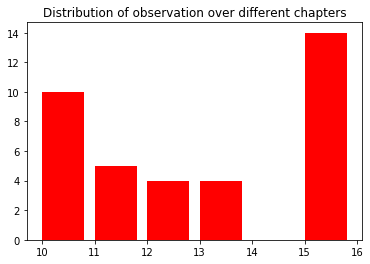

In [18]:
plt.bar(list(dfChobs),a,color="r",align='edge', width=.8)

plt.title("Distribution of observation over different chapters")


## Distribution of explicit observational Sentences

In [19]:
X=list(df["Sentence"])
y=np.array(list(df["Label"]))

In [20]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [21]:
count

{0: 1487, 1: 37}

Text(0.5, 1.0, 'Distribution of samples over different classes')

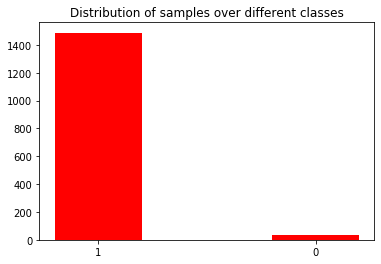

In [22]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [23]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [24]:
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier

#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [25]:
trial_05

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

# Extract explicit observational sentences using custom NER in the paragraph

In [26]:
X_Obs=df.loc[df.Label==1]
X_Obs=X_Obs[["Sentence","Paragraph"]]


In [27]:
X_Obs.head(10)


,Sentence,Paragraph
158,"On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows.","On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows. Now this observation is distant and isolated. It was reduced to the moment of opposition using the diurnal motion from the Prutenic Tables ^3."
168,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6.","On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax."
175,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8.","On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8. The diurnal motion, by comparison of observations, was 24’ 15”. The moment of opposition followed at 19h 35m, 7 hours and 35 minutes later. To this period belongs 7’ 41” of diurnal motion westward. Therefore, at the designated moment, it would have been at 21° 10’ 30” Leo, which is what was accepted. There is no mention of parallax. Nothing had to be done about refraction, because Mars was high and at mid-sky. I therefore find the bit of advice in the table about refraction (properly) ignored."
183,"On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo.","On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo. This they kept in the table, but changed the time to 17h 22m. The difference of 1h 48m multiplied by a diurnal motion of 24’ gives the same number of minutes and seconds (that is, 1’ 48”), no more. It therefore should have been 25° 8’ 32” Virgo, which also approaches nearer the point opposite the sun. The difference is of practically no importance ^9."
188,"On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10.","On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10. There remain 1h 30m until the designated moment of opposition, which, for a diurnal motion of 22', bring the planet back 1’ 22”, so as to be at 3° 55’ 49”. They took the value of 3° 58’ 10”. The former is closer to the sun’s mean position."
192,"On 1591 June 6 at 12h 20m, Mars is placed at 27° 15’ Sagittarius ^11.","On 1591 June 6 at 12h 20m, Mars is placed at 27° 15’ Sagittarius ^11. There remained 2 days 4 hours and 5 minutes until the designated moment. In four days it was found to be moved forward 1° 12’ 47”. Therefore, to 2d 4h 5m correspond 39’ 29”. Consequently, at that moment Mars was at 26° 35’ 31” Sagittarius. There is no need to consider any horizontal variations in longitude, since Mars is at mid-sky and at the beginning of Capricorn. The table has 26° 32’ Sagittarius."
199,"On 1593 24 August at 10h 30m they report Mars as being at 12° 38’ Pisces12 with an observed diurnal motion of 16’ 45”, and this near the nonagesimal13 where there 

In [28]:
Y_Obs=df.loc[df.Label==1]
Y_Obs=Y_Obs.Label
Y_Obs=list(Y_Obs)
NumberObs=len(Y_Obs)

# Non-observational sentences  in the pragraph

In [29]:
X_NObs=df.loc[df.Label==0]
X_NObs=X_NObs[["Sentence","Paragraph"]]

In [30]:
X_NObs.head(10)

,Sentence,Paragraph
0,Chapter 7,Chapter 7
1,The circumstances under which I happened upon the theory of Mars.,The circumstances under which I happened upon the theory of Mars.
2,"It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions.","It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions. Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence."
3,"Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence.","It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions. Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence."
4,"When, in my early years, I was able to taste the sweetness of philosophy, I embraced the whole of it with an overwhelming desire, and with practically no special concern about astronomy.","When, in my early years, I was able to taste the sweetness of philosophy, I embraced the whole of it with an overwhelming desire, and with practically no special concern about astronomy. I certainly had enough intelligence, nor did I have any difficulty understanding the geometrical and astronomical topics included in the normal curriculum, aided as I was by figures, numbers, and proportions. These were, however, required courses, nothing that would bespeak an exceptional inclination towards astronomy. And since I was supported at the expense of the Duke of Württemberg, and saw my comrades, whom the Prince, upon request, kept trying to send to foreign countries, stalling in various ways out of love for their country, I, being hardier, quite maturely agreed with myself that whithersoever I was destined I would promptly go."
5,"I certainly had enough intelligence, nor did I have any difficulty understanding the geometrical and astronomical topics included in the normal curriculum, aided as I was by figures, numbers, and proportions.","When, in my early years, I was able to taste the sweetness of philosophy, I embraced the whole of it with an overwhelming desire, and with practically no special concern about astronomy. I certainly had enough intelligence, nor did I have any difficulty understanding the geometrical and astronomical topics included in the normal curriculum, aided as I was by figures, numbers, and proportions. These were, however, required courses, nothing that would bespeak an exceptional inclination towards astronomy. And since I was supported at the expense of the Duke of Württemberg, and saw my comrades, whom the Prince, upon request, kept trying to send to foreign countries, stalling in various ways out of love for their country, I, being hardier, quite maturely agreed with myself that whithersoever I was destined I would promptly go."
6,"These were, however, required courses, nothing that would bespeak an exceptional inclination towards astronomy.","When, in my early years, I was able to taste the swee

In [31]:
Y_NObs=df.loc[df.Label==0]
Y_NObs=Y_NObs.Label
Y_NObs=list(Y_NObs)

In [32]:
x_obs = X_Obs.loc[0:, 'Sentence'].values
x_nobs = X_NObs.loc[0:36, 'Sentence'].values


In [33]:
len(x_obs)

37

In [34]:
len(x_nobs)

37

In [35]:
number_of_samples = len(Y_Obs)
Y_NObs=random.sample(Y_NObs,NumberObs);
len(Y_NObs)

37

In [36]:
y=Y_NObs+Y_Obs

In [37]:
X1=x_nobs.tolist()

In [38]:
len(X1)

37

In [39]:
X2=x_obs.tolist()

In [40]:
X=X1+X2

In [41]:
len(X)

74

In [42]:
len(y)

74

# Distribution of Samples  after downsampling

In [43]:
category=Counter(y)
count=dict(category)

Text(0.5, 1.0, 'Distribution of samples over different classes')

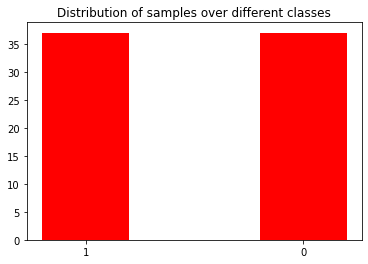

In [44]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")

In [45]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.10, random_state=42)  

# 1- Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
trial_06=Pipeline([("vect",vec),("clf",RF)])
trial_06.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [47]:
cross_validation_accuracy(trial_06,X,y,cv=10)

[0.875 1.    1.    1.    1.    1.    1.    1.    1.    1.   ]
Accuracy of : 0.988 ± 0.075


In [48]:
y_pred = cross_val_predict(trial_06, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.97      0.95      0.96        37

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



In [49]:
print(cm)

[[36  2]
 [ 1 35]]


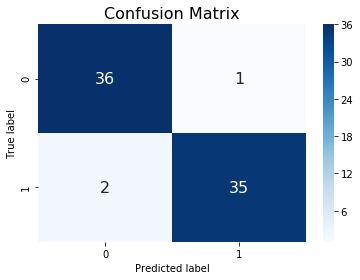

In [50]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [51]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


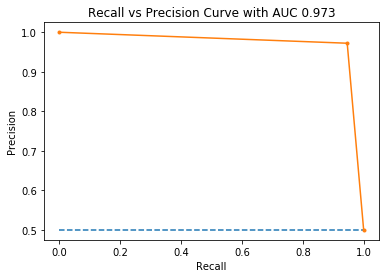

AUC: 0.973


In [52]:
plot_pr(recall, precision)

## 2-SGD

In [53]:
trial_05.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [54]:
y_pred=trial_05.predict(X_test)

In [55]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Colorful_Confusion_Matrix(y, y_test, y_pred)


[[4 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [56]:
cross_validation_accuracy(trial_05,X,y,cv=10)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy of : 1.000 ± 0.000


In [57]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

[[36  0]
 [ 1 37]]


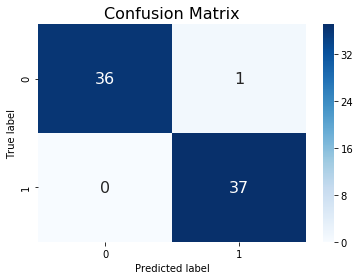

In [58]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [59]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


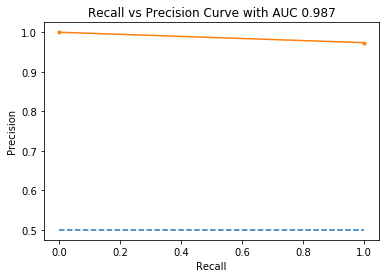

AUC: 0.987


In [60]:
plot_pr(recall, precision)

##  Save the down sampled model

import pickle
saved_model = pickle.dumps(trial_06)

Pkl_Filename = "Pickle_RF_RESAMPLED_Model_02.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(trial_06, file)

# Add visualisation for interpretation

In [66]:
dfObs=df[df.Label==1]

In [67]:
def ShowObs(a=1):
    return dfObs.head(a)


In [68]:
interact(ShowObs, a=(1,50));

interactive(children=(IntSlider(value=1, description='a', max=50, min=1), Output()), _dom_classes=('widget-int…

In [ ]:
X_test


In [ ]:
from lime.lime_text import LimeTextExplainer
#class_names = ['Observation', 'Not-Observation']
explainer = LimeTextExplainer()
idx = 83
exp = explainer.explain_instance(X_test[6], trial_06.predict_proba, num_features=20)

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()